# PROJECT 2: SALE PREDICTION MODEL 

Sales prediction model build on the analysis of the relationship between TV advertising and Sales

1.IMPORTING LIBRARIES

In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


2.LOAD THE DATASET 

In [61]:
df = pd.read_csv("advertising.csv")
display(df)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


3.EDA

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [32]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
df.isnull()
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


3.PLOT AND GRAPH ANALYSIS

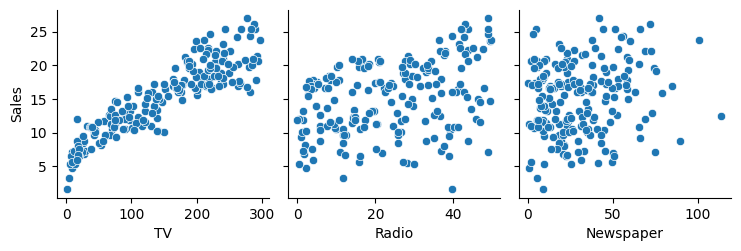

In [33]:
sns.pairplot(x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales" ,data=df)
plt.show()


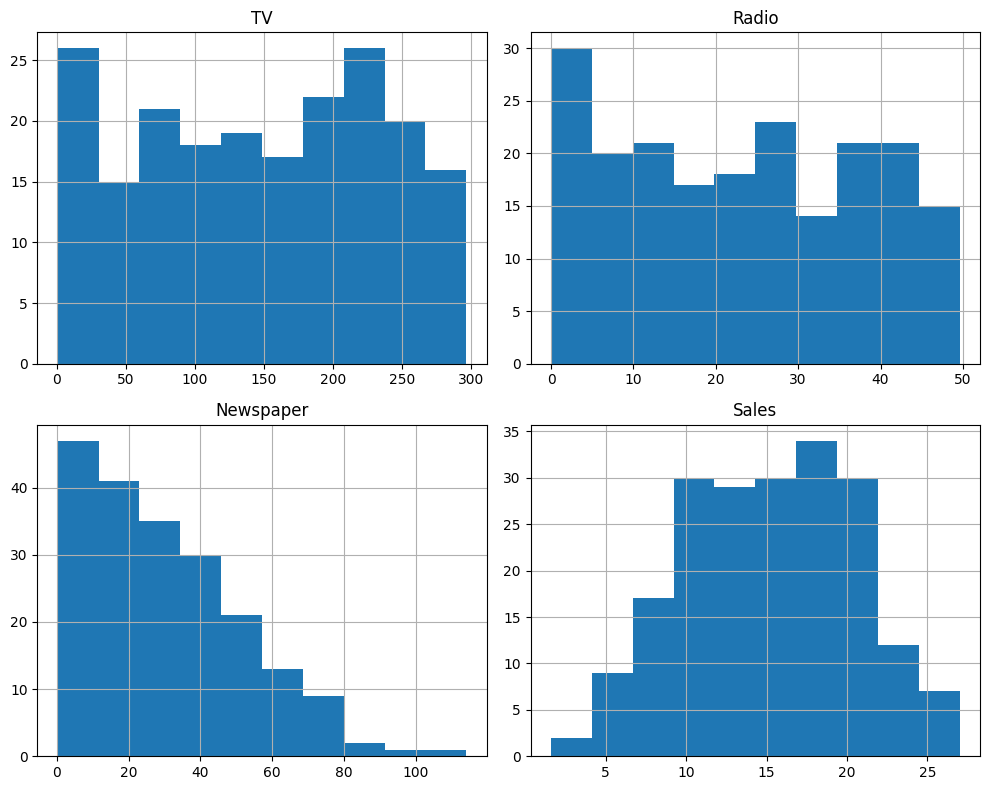

In [49]:
df.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

4. SPLIT THE DATA AND SELECT THE MODEL

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [40]:
X_train , X_test , y_train , y_test  = train_test_split(df["TV"], df["Sales"] , test_size=0.3,random_state=0)


In [41]:
X_train.head()

131    265.2
96     197.6
181    218.5
19     147.3
153    171.3
Name: TV, dtype: float64

In [42]:
y_train.head()

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
Name: Sales, dtype: float64

In [43]:
model = LinearRegression()

5. TRAIN THE MODEL AND PREDICT

In [44]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [ ]:
# Reshape X_train and X_test to be 2D arrays
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(y_pred[:5])

[10.93127621  9.88042193 12.09159447 22.99968079 16.45920756]


In [55]:
print(y_test.head())

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
Name: Sales, dtype: float64


6.EVALUATION AND ACCURACY

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 1.8639438916550555
Mean Squared Error (MSE): 5.569539193467241
R-squared: 0.8150168765722069


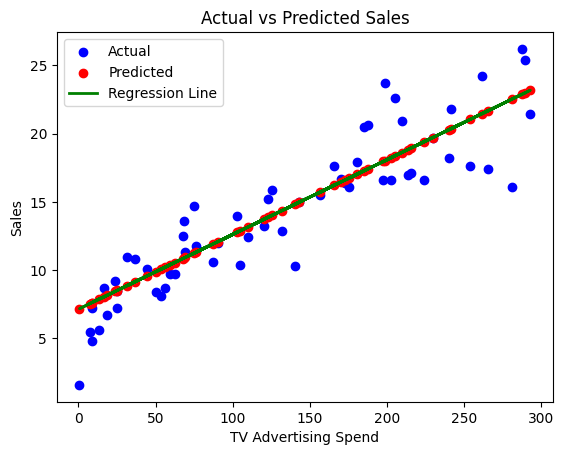

In [66]:
# Plot the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')

# Plot the regression line
plt.plot(X_test, y_pred, color='green', linewidth=2, label='Regression Line')

plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [67]:
print(f"Model Accuracy (R-squared): {r2}")

Model Accuracy (R-squared): 0.8150168765722069
